In [121]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
pd.options.display.float_format = '{:,.3f}'.format
data_dir = Path("datasets")

In [122]:
# Adult: predict >50K
filepath = data_dir / 'adult' / 'data.csv'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status',  'occupation', 'relationship', 'race',
 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
 'native_country', 'salary']
adult = pd.read_csv(filepath, na_values=[" ?"], names=columns, header=0)
adult['salary'] = adult.salary.str.contains('>50K').astype(int) #above "50k" or "50k."

## 4. Data description

## 4.A.

In [123]:
print(f"There are: {adult.shape[0]} observations in the data")

There are: 48842 observations in the data


## Data Proccessing

We have found that each string feature starts with a leading " " (whitespace) 
and we have decided to use strip in order to remove it

In [124]:
for col in adult:
    if adult[col].dtype == 'object':
        adult[col] = adult[col].str.strip()

## 4.B.

In [125]:
print(f"There are: {adult.shape[1]} features in the data")
adult.info()

There are: 15 features in the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  salary          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


## 4.C.

0   0.761
1   0.239
Name: salary, dtype: float64


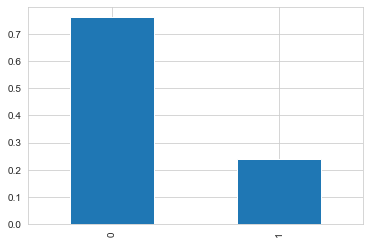

In [126]:
print(adult['salary'].value_counts(normalize=True))
adult.salary.value_counts(normalize=True).plot(kind='bar');

## 4.D.

In [127]:
adult.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native_country     857
salary               0
dtype: int64

As we can see workclass has 2799 NA, occupation has 2809 NA, and native_country has 857 NA

## 4.E.

## Visualiztion

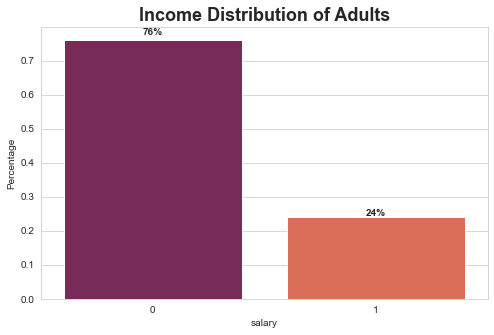

In [128]:
# 1st visualiztion: histplot of salary

sns.set_style("whitegrid")

plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = adult['salary'].value_counts(normalize = True).rename_axis('salary').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary', y = 'Percentage', data = eda_percentage.head(10), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

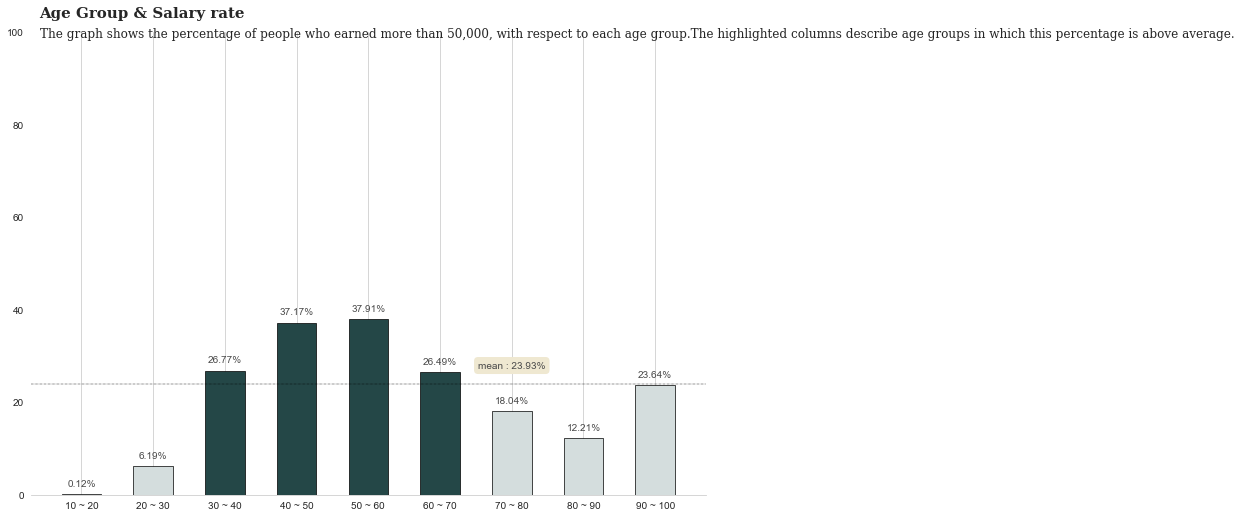

In [129]:
#2nd visualization: by Age-group
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

adult['age_group'] = adult['age'].apply(age_band)
adult_age = adult[['age_group', 'salary']].groupby('age_group')['salary'].value_counts().sort_index().unstack().fillna(0)
adult_age['salary_rate'] = adult_age[1] / (adult_age[0] + adult_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = '#244747' # color highlight
color_map[3] = '#244747' # color highlight
color_map[4] = '#244747' # color highlight
color_map[5] = '#244747' # color highlight


ax.bar(adult_age['salary_rate'].index, adult_age['salary_rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in adult_age['salary_rate'].index:
    ax.annotate(f"{adult_age['salary_rate'][i]:.02f}%", 
                   xy=(i, adult_age['salary_rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = adult['salary'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Group & Salary rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'The graph shows the percentage of people who earned more than 50,000, with respect to each age group.The highlighted columns describe age groups in which this percentage is above average.',
         fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

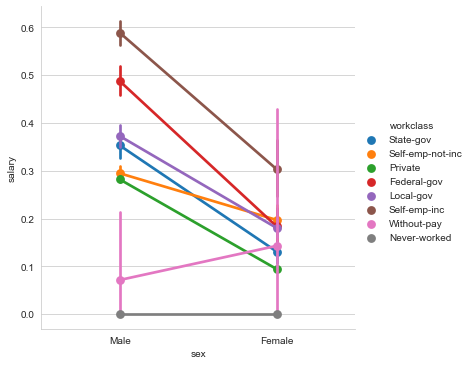

In [130]:
#3rd visualization by Work-class
sns.catplot(x="sex", y="salary", hue="workclass", kind="point", data=adult)

<AxesSubplot:xlabel='race', ylabel='salary'>

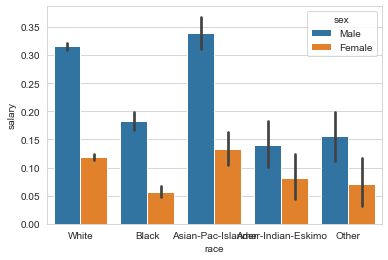

In [131]:
sns.barplot(x='race', y='salary', hue='sex', data=adult)

Text(0.5, 1.0, 'Sex and Age vs Salary')

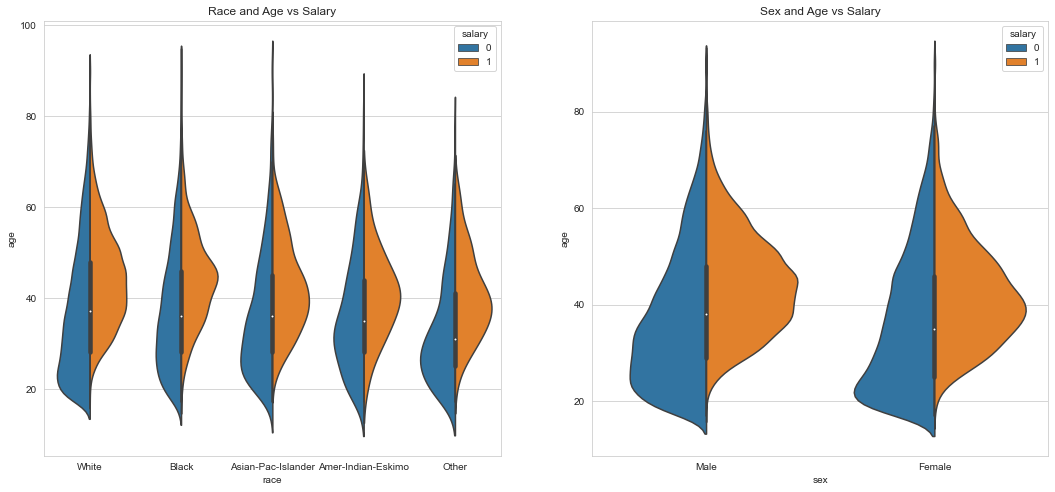

In [132]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='race',y='age',hue='salary',data=adult,split=True,ax=ax[0])
ax[0].set_title('Race and Age vs Salary')
sns.violinplot(x="sex",y="age", hue="salary", data=adult,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Salary')

In [133]:
salary_rate = adult.groupby(['sex']).mean()[['salary']]
male_rate = salary_rate.loc['Male']
female_rate = salary_rate.loc['Female']

In [134]:
male_pos = np.random.uniform(0, male_rate, len(adult[(adult['sex']=='Male') & (adult['salary']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(adult[(adult['sex']=='Male') & (adult['salary']==0)]))
female_pos = np.random.uniform(0, female_rate, len(adult[(adult['sex']=='Female') & (adult['salary']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(adult[(adult['sex']=='Female') & (adult['salary']==0)]))

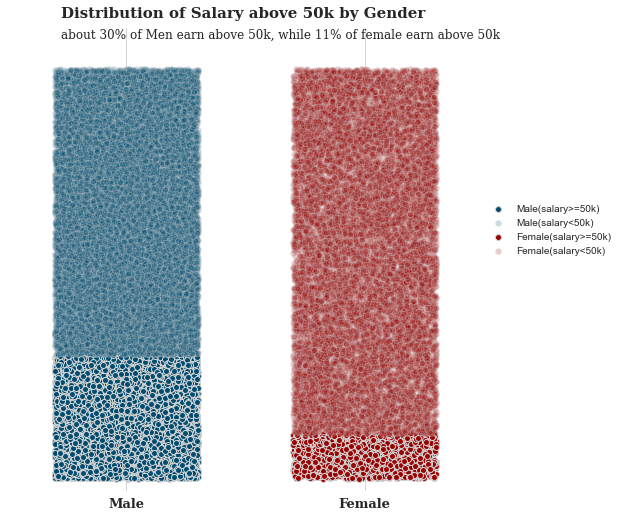

,salary
sex,
Female,0.109
Male,0.304


In [135]:
#4th visualization by Gender

fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(salary>=50k)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(salary<50k)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(salary>=50k)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(salary<50k)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Salary above 50k by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'about 30% of Men earn above 50k, while 11% of female earn above 50k', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()
display(salary_rate)

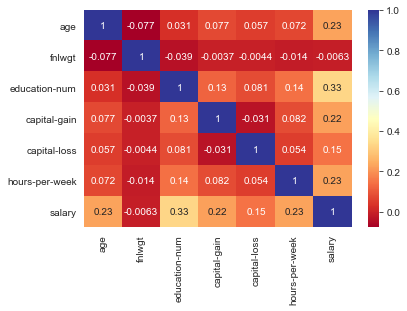

In [136]:
#5th visualization Heatmap 
sns.heatmap(adult.corr(), cmap='RdYlBu', annot=True);

## 5. Data engineering:

In [137]:
adult = adult.astype({"workclass": str, "education": str})

In [138]:
#5 a
adult = adult.drop('fnlwgt', axis=1)

In [139]:
adult['age'].describe()

count   48,842.000
mean        38.644
std         13.711
min         17.000
25%         28.000
50%         37.000
75%         48.000
max         90.000
Name: age, dtype: float64

In [140]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 16 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    return "Greater than 70"
#5 a+b
adult['age_group'] = adult['age'].apply(age_group)
adult = adult.drop('age', axis=1)

In [141]:
# We merge Self-emp-not-inc and inc to Self-emp
adult['workclass'] = adult['workclass'].str.replace('Self-emp-not-inc','Self-emp')
adult['workclass'] = adult['workclass'].str.replace('Self-emp-inc','Self-emp')

#We merge local,State and Fed to "Gov"
adult['workclass'] = adult['workclass'].str.replace('Local-gov','Gov')
adult['workclass'] = adult['workclass'].str.replace('State-gov','Gov')
adult['workclass'] = adult['workclass'].str.replace('Federal-gov','Gov')

adult['workclass'] = adult['workclass'].str.replace('nan','unknown')
adult['workclass'] = adult['workclass'].str.replace('Without-pay','unknown') #21
adult['workclass'] = adult['workclass'].str.replace('Never-worked','unknown') #10

In [142]:
adult['workclass'].value_counts()

Private     33906
Gov          6549
Self-emp     5557
unknown      2830
Name: workclass, dtype: int64

In [143]:
adult['capital-gain'].value_counts(normalize=True)

0       0.917
15024   0.011
7688    0.008
7298    0.007
99999   0.005
         ... 
1111    0.000
6612    0.000
2387    0.000
22040   0.000
1731    0.000
Name: capital-gain, Length: 123, dtype: float64

In [144]:
adult['capital-loss'].value_counts(normalize=True)

0      0.953
1902   0.006
1977   0.005
1887   0.005
2415   0.001
        ... 
155    0.000
1870   0.000
2465   0.000
1911   0.000
2080   0.000
Name: capital-loss, Length: 99, dtype: float64

In [145]:
adult['capital-net'] = adult['capital-gain'] - adult['capital-loss']
adult = adult.drop(['capital-gain','capital-loss'], axis=1)

In [146]:
adult['capital-net'].value_counts(normalize=True)

 0       0.871
 15024   0.011
 7688    0.008
 7298    0.007
-1902    0.006
          ... 
 22040   0.000
-1911    0.000
 2387    0.000
-2080    0.000
-1870    0.000
Name: capital-net, Length: 221, dtype: float64

In [147]:
adult['education'] = adult['education'].str.replace('Preschool','No-Matriculation')
adult['education'] = adult['education'].str.replace('1st-4th','No-Matriculation')
adult['education'] = adult['education'].str.replace('5th-6th','No-Matriculation')
adult['education'] = adult['education'].str.replace('7th-8th','No-Matriculation')
adult['education'] = adult['education'].str.replace('9th','No-Matriculation')
adult['education'] = adult['education'].str.replace('10th','No-Matriculation')
adult['education'] = adult['education'].str.replace('11th','No-Matriculation')
adult['education'] = adult['education'].str.replace('12th','No-Matriculation')

adult['education'] = adult['education'].str.replace('Assoc-voc','Assoc')
adult['education'] = adult['education'].str.replace('Assoc-acdm','Assoc')

In [148]:
adult = adult.fillna('unknown')

In [149]:
country_to_con = {
       'Asia':['Iran', 'Thailand', 'China', 'Taiwan', 'India',
               'Vietnam','Cambodia', 'Philippines', 'Hong', 
               'Laos','Japan', ],
    
       'America':['United-States', 'Outlying-US(Guam-USVI-etc)',
                  'Jamaica', 'Mexico','Canada','Jamaica',
                  'Nicaragua', 'Haiti', 'Cuba','Puerto-Rico', 'Columbia',
                  'Guatemala','Trinadad&Tobago', 'Dominican-Republic',
                  'Honduras','El-Salvador','Ecuador','Peru',],
        
       'Europe': ['Germany','Holand-Netherlands','Italy',
                  'England','Portugal','Poland', 'France',
                  'Scotland','Ireland','Hungary',
                  'Greece',
                  'Yugoslavia',
                   ],
    
       'Africa': ['South', ]
       
}

In [150]:
countries = adult['native_country'].unique()
for country in countries:
    for continent in country_to_con:
        if country in country_to_con[continent]:
            adult['native_country'] = adult['native_country'].replace(country, continent)

## Modeling

In [151]:
X = adult.drop('salary', axis=1)
y = adult.salary

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [153]:
def encode_data(enc, data, categorical_cols, is_train=True):
    if is_train:
        transformed_data = enc.fit_transform(data[categorical_cols])
    else:
        transformed_data = enc.transform(data[categorical_cols])
    
    encoded_data = pd.DataFrame(transformed_data.toarray(), columns=enc.get_feature_names(categorical_cols)).reset_index(drop=True)
    print(encoded_data.shape)
    
    data_other_cols = data.drop(columns=categorical_cols).reset_index(drop=True)
    print(data_other_cols.shape)

    #Concatenate the two dataframes : 
    return pd.concat([data_other_cols, encoded_data], axis=1)

In [154]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

categorical_cols = ['sex', 'workclass', 'education',
                    'marital-status', 'occupation', 'relationship',
                    'race', 'native_country', 'age_group',]

encoded_train = encode_data(one_hot_encoder, X_train, categorical_cols)
encoded_test = encode_data(one_hot_encoder, X_test, categorical_cols, is_train=False)

(32724, 58)
(32724, 3)
(16118, 58)
(16118, 3)


The benchmark would be the most common label in the train set

In [94]:
models = []

In [95]:
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(x.shape[0])*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(encoded_train, benchmark_value)
y_test_pred = get_benchmark_predictions(encoded_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

models.append(
{
    'model_name':'benchmark',
    'test_acc': test_acc,
}
)

In [96]:
def get_score(clf, X, y):
    y_pred = clf.predict(X)
    score = accuracy_score(y, y_pred)
    return score

In [97]:
def get_name(clf):
    return str(clf.__class__.__name__)

In [98]:
# This will plot the accuracies as a function of k.
def plot_test_train(k, test_acc, train_acc):
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(111)
    ax1.scatter(k, train_acc, s=30, c='b', marker="s", label='Training Accuracy')
    ax1.scatter(k, test_acc, s=30, c='r', marker="o", label='Testing Accuracy')
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("k")

    plt.legend(loc='upper right');
    plt.show()

In [99]:
def model_test(models, clf, score):
    
        models.append({
        'model_name': (get_name(clf)),
        'test_acc': score,
            
        }
        )
        
        return models

## 6. Algorithm performance

## 6.b.1-KNN

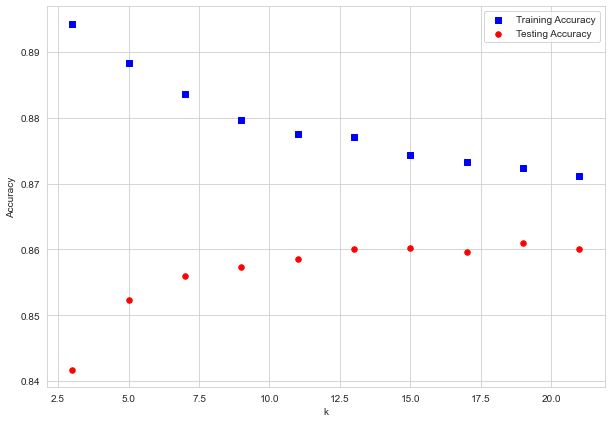

In [42]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
k = range(3,22,2)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))
    
plot_test_train(k, test_acc, train_acc)

In [43]:
pd.DataFrame(models)

,model_name,test_acc
0,benchmark,0.765
1,KNeighborsClassifierK=3,0.842
2,KNeighborsClassifierK=5,0.852
3,KNeighborsClassifierK=7,0.856
4,KNeighborsClassifierK=9,0.857
5,KNeighborsClassifierK=11,0.859
6,KNeighborsClassifierK=13,0.860
7,KNeighborsClassifierK=15,0.860
8,KNeighborsClassifierK=17,0.860
9,KNeighborsClassifierK=19,0.861


## 6.b.2- scaled KNN

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(encoded_train)
x_test_scaled = scaler.transform(encoded_test)

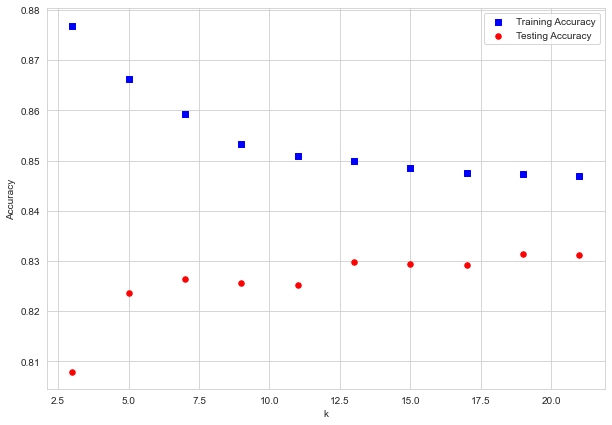

In [45]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_scaled, y_train)
    
    train_acc.append(get_score(clf, x_train_scaled, y_train))
    test_acc.append(get_score(clf, x_test_scaled, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))

scores = train_acc, test_acc
plot_test_train(k, test_acc, train_acc)

## 6.b.3 - Decision Tree Classifier

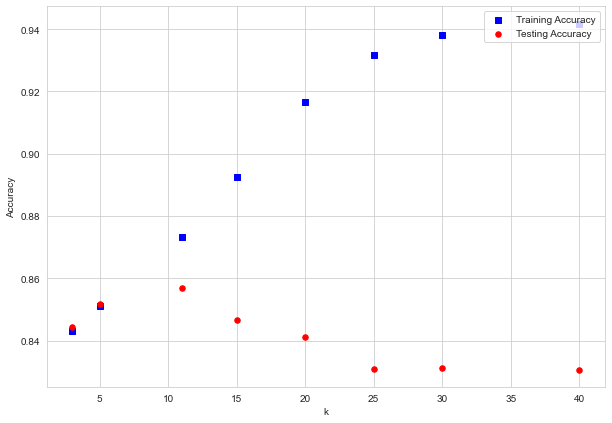

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_acc = []
test_acc = []
k = [3,5,11,15,20,25,30,40]
for i in k:
    clf = DecisionTreeClassifier(random_state=0,max_depth=i)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))


plot_test_train(k, test_acc, train_acc)

## 6.b.4 - Random Forest Classifier

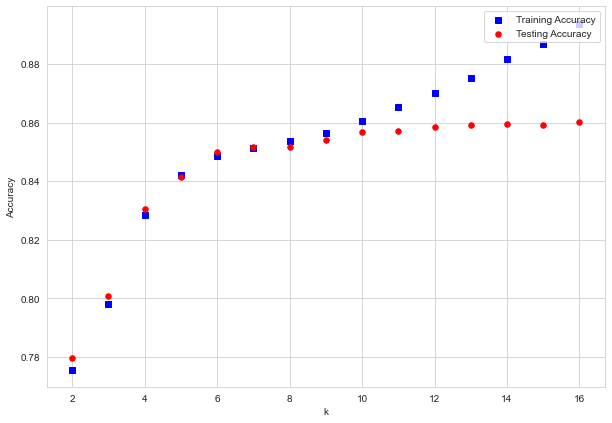

In [102]:
from sklearn.ensemble import RandomForestClassifier
train_acc = []
test_acc = []
k = range(2,17,1)
for i in k:
    clf = RandomForestClassifier(random_state=0,max_depth=i, n_estimators=100)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))
    
plot_test_train(k, test_acc, train_acc)

## 6.b.5 - AdaBoost

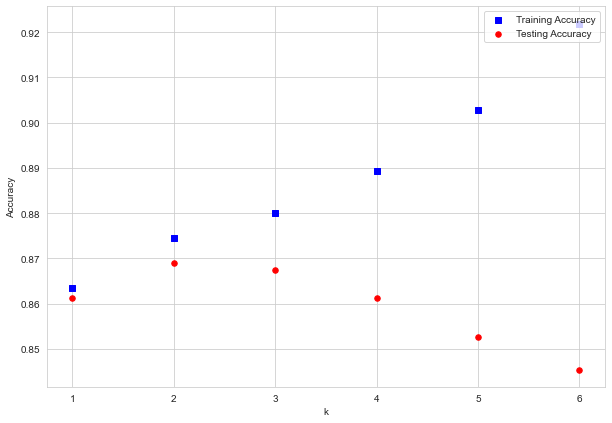

In [103]:
from sklearn.ensemble import AdaBoostClassifier
train_acc = []
test_acc = []
k = range(1,7)
for i in k:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(random_state=0,base_estimator=clf ,n_estimators=100)
    clf.fit(encoded_train, y_train)
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))

plot_test_train(k, test_acc, train_acc)

In [49]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
45,AdaBoostClassifier Depth=2,0.869
46,AdaBoostClassifier Depth=3,0.867
44,AdaBoostClassifier Depth=1,0.861
47,AdaBoostClassifier Depth=4,0.861
9,KNeighborsClassifierK=19,0.861
7,KNeighborsClassifierK=15,0.860
43,RandomForestClassifier Depth=16,0.860
10,KNeighborsClassifierK=21,0.860
6,KNeighborsClassifierK=13,0.860
41,RandomForestClassifier Depth=14,0.860


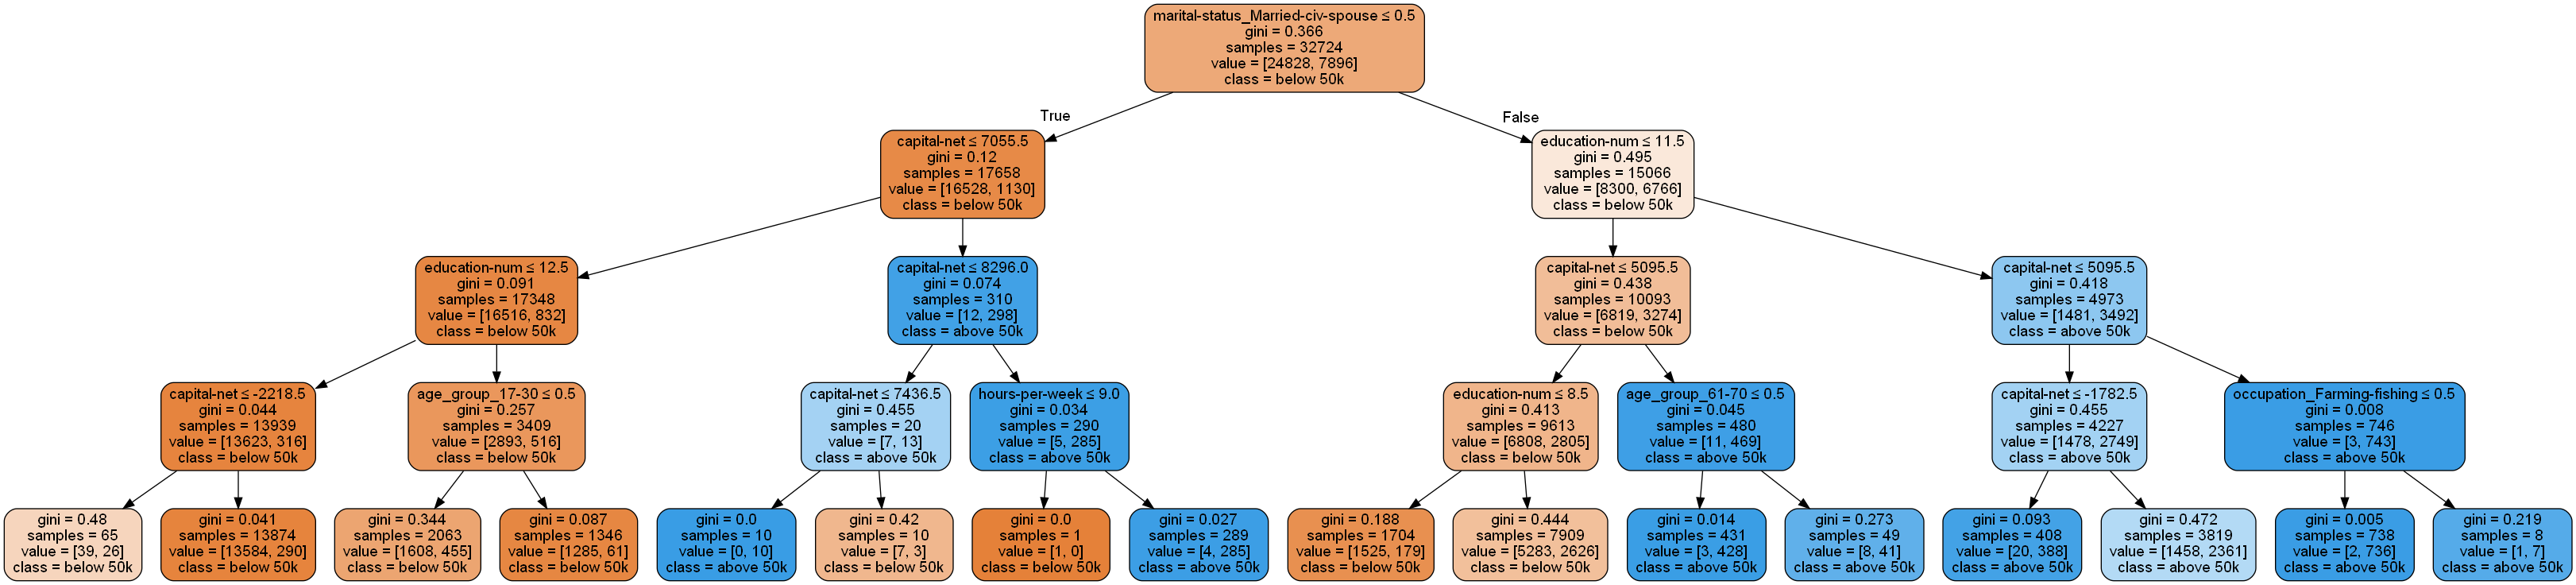

In [50]:
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(encoded_train, y_train)
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = list(encoded_train.columns),
                class_names=['below 50k','above 50k'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
graph.write_png('tree.png')

True

Text(0.5, 1.0, 'Feature Importance of Random Forest Tree')

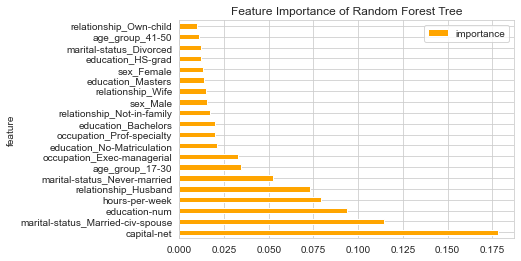

In [52]:
clf = RandomForestClassifier(random_state=0,max_depth=16, n_estimators=100)
clf = clf.fit(encoded_train, y_train)
importance = clf.feature_importances_
features = encoded_train.columns
importance_df = pd.DataFrame({'feature':features, 'importance':importance})
for_graph = importance_df.sort_values('importance', ascending=False)[:20]
for_graph.plot(y='importance', x='feature', kind='barh', color='orange')
plt.title('Feature Importance of Random Forest Tree')

In [165]:
## Best algorithm
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=0)
clf.fit(encoded_train, y_train)

y_pred = clf.predict(encoded_test)

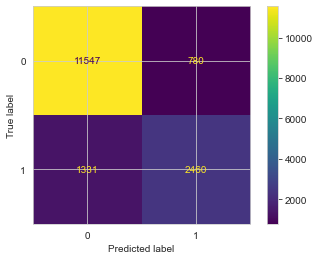

In [166]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)

disp.plot()
plt.show()

##  Further analysis

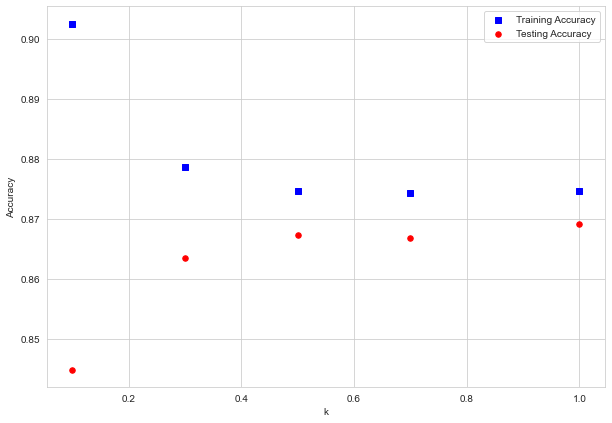

In [169]:
fracs = [0.1, 0.3, 0.5, 0.7, 1]
sizes = [int(frac*len(encoded_train)) for frac in fracs]
train_acc = []
test_acc = []
for size in sizes:
    X_train_frac = encoded_train.head(size)
    y_train_frac = y_train.head(size)
    clf.fit(X_train_frac, y_train_frac)
    
    train_acc.append(get_score(clf, X_train_frac, y_train_frac))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models = model_test(models, clf, get_score(clf, encoded_test, y_test))

plot_test_train(fracs, test_acc, train_acc)

In [172]:
ada_1 = DecisionTreeClassifier(max_depth=1)
ada_1 = AdaBoostClassifier(base_estimator=ada_1, n_estimators=100, random_state=0)
ada_1.fit(encoded_train, y_train)
y_pred1 = ada_1.predict(encoded_test)

In [173]:
ada_2 = DecisionTreeClassifier(max_depth=2)
ada_2 = AdaBoostClassifier(base_estimator=ada_2, n_estimators=100, random_state=0)
ada_2.fit(encoded_train, y_train)
y_pred2 = ada_2.predict(encoded_test)

In [174]:
ada_3 = DecisionTreeClassifier(max_depth=3)
ada_3 = AdaBoostClassifier(base_estimator=ada_3, n_estimators=100, random_state=0)
ada_3.fit(encoded_train, y_train)
y_pred3 = ada_3.predict(encoded_test)

In [181]:
y_pred = np.round(np.mean( np.array([y_pred1, y_pred2, y_pred3]), axis=0))

In [192]:
round(accuracy_score(y_test, y_pred), 4)

0.8703

In [188]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
33,AdaBoostClassifier,0.869
45,AdaBoostClassifier,0.869
60,AdaBoostClassifier,0.869
55,AdaBoostClassifier,0.869
50,AdaBoostClassifier,0.869
...,...,...
18,RandomForestClassifier,0.801
10,RandomForestClassifier Depth=3,0.801
17,RandomForestClassifier,0.779
9,RandomForestClassifier Depth=2,0.779
